The problem statement for this analysis is given in the link: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_v9rqX0R.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.describe(include = object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [6]:
cat = df.select_dtypes(include =object).columns
cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

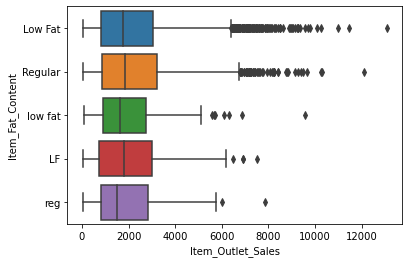

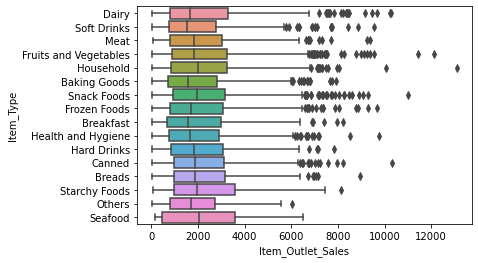

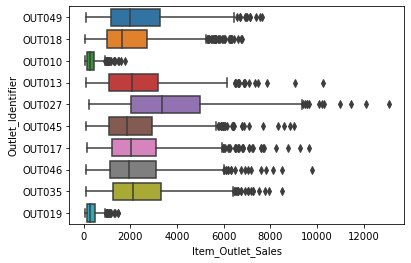

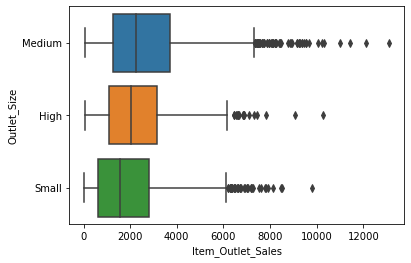

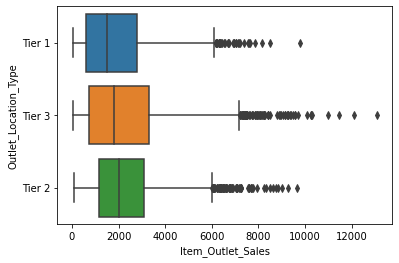

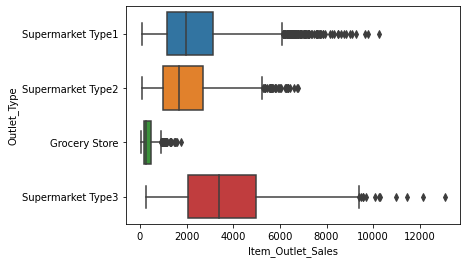

In [7]:
for i, f in enumerate(cat[1:]):
    plt.figure(i)
    sns.boxplot(data = df, x = 'Item_Outlet_Sales', y = f)

In [8]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Fat_Content'>

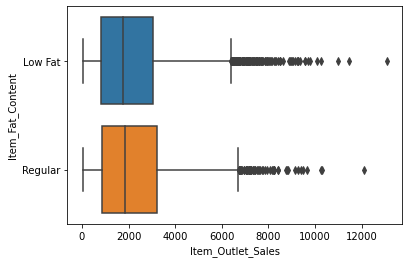

In [10]:
sns.boxplot(data = df, x = 'Item_Outlet_Sales', y = 'Item_Fat_Content')

<AxesSubplot:xlabel='Count', ylabel='Outlet_Identifier'>

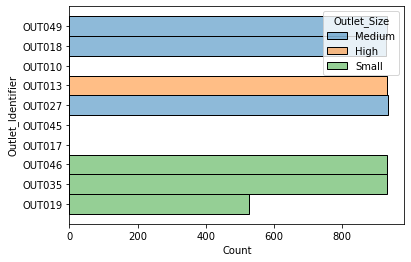

In [11]:
sns.histplot(data =df, y = 'Outlet_Identifier', hue = 'Outlet_Size' )

<AxesSubplot:xlabel='Count', ylabel='Outlet_Identifier'>

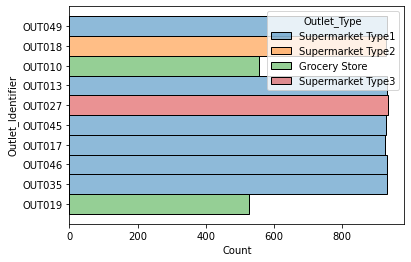

In [12]:
sns.histplot(data =df, y = 'Outlet_Identifier', hue = 'Outlet_Type' )

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

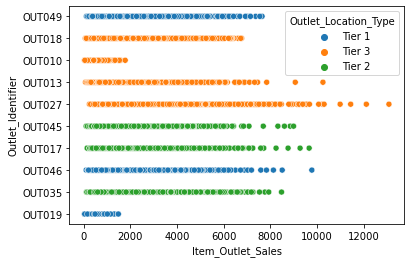

In [13]:
sns.scatterplot(data =df,x = 'Item_Outlet_Sales', y = 'Outlet_Identifier',hue ='Outlet_Location_Type')

In [14]:
# OUT010: Small from Sales amount.
# OUT045: Small
# OUT017: Small 

## Numerical features

In [15]:
num = df.select_dtypes(exclude = object).columns
num

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

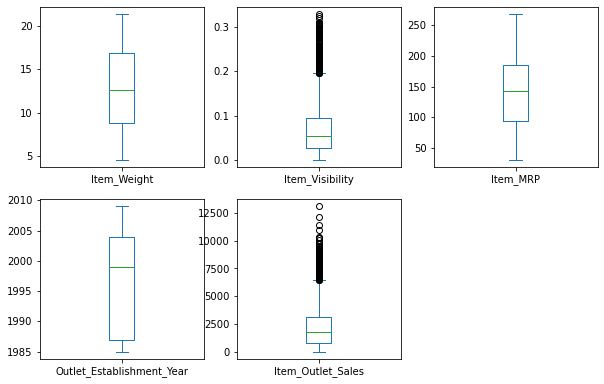

In [16]:
df.plot(kind ='box', subplots =True,sharex =True,sharey= False, layout = (3,3), figsize=(10,10))
plt.show()

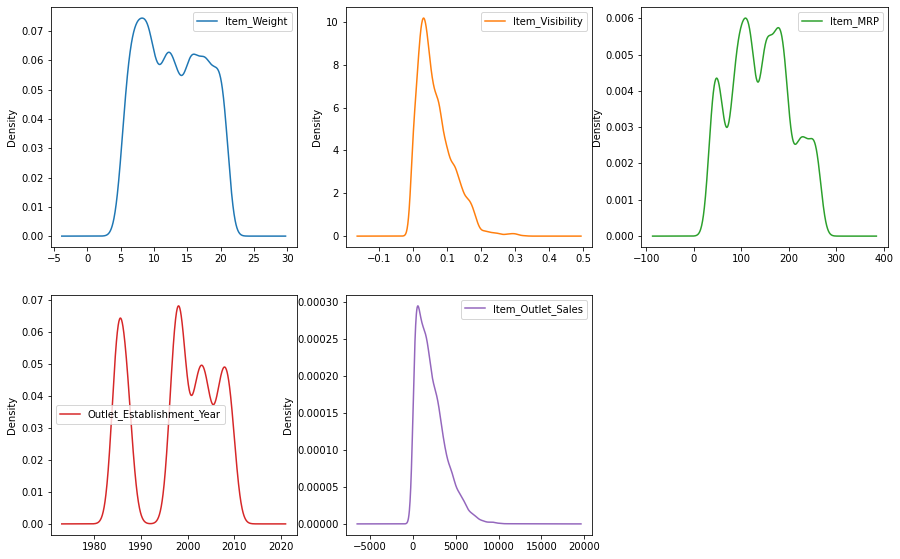

In [17]:
df.plot(kind ='kde', subplots =True,sharex =False,sharey= False, layout = (3,3), figsize=(15,15))
plt.show()

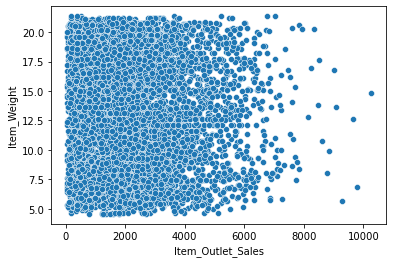

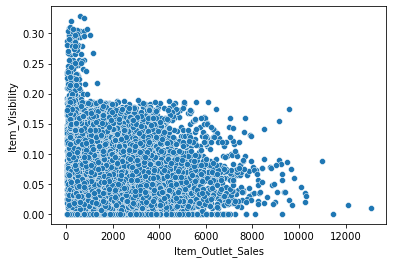

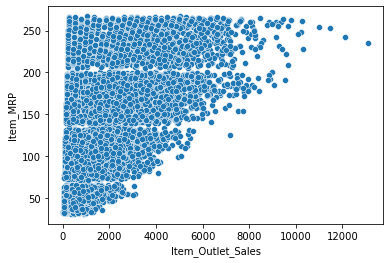

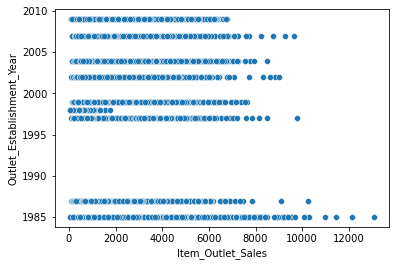

In [18]:
for i,f in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']):
    plt.figure(i)
    sns.scatterplot(data =df, x = 'Item_Outlet_Sales', y = f)
  

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Identifier'>

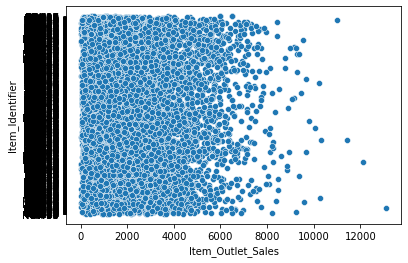

In [19]:
sns.scatterplot(data =df, x = 'Item_Outlet_Sales', y = 'Item_Identifier')

In [20]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Missing Values

In [21]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
df.shape

(8523, 12)

In [23]:
# From EDA we found 3 outliers size is missing.
df[df['Outlet_Identifier']=='OUT010']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [24]:
s1 =set(df[df['Outlet_Size']=='Small']['Item_Type'].unique())

In [25]:
s2= set(df[df['Outlet_Identifier']=='OUT010']['Item_Type'].unique())

In [26]:
s1.difference(s2)

set()

In [27]:
df.loc[df['Outlet_Identifier']=='OUT010','Outlet_Size'] = df[df['Outlet_Identifier']=='OUT010']['Outlet_Size'].fillna('Small')

In [28]:
df[df['Outlet_Identifier']=='OUT045']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440
...,...,...,...,...,...,...,...,...,...,...,...,...
8483,DRI11,8.260,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [29]:
s3= set(df[df['Outlet_Identifier']=='OUT045']['Item_Type'].unique())

In [30]:
s1.difference(s3)

set()

In [31]:
df.loc[df['Outlet_Identifier']=='OUT045','Outlet_Size'] = df[df['Outlet_Identifier']=='OUT045']['Outlet_Size'].fillna('Small')

In [32]:
s4= set(df[df['Outlet_Identifier']=='OUT017']['Item_Type'].unique())

In [33]:
s1.difference(s4)

set()

In [34]:
df.loc[df['Outlet_Identifier']=='OUT017','Outlet_Size'] = df[df['Outlet_Identifier']=='OUT017']['Outlet_Size'].fillna('Small')

In [35]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Type'>

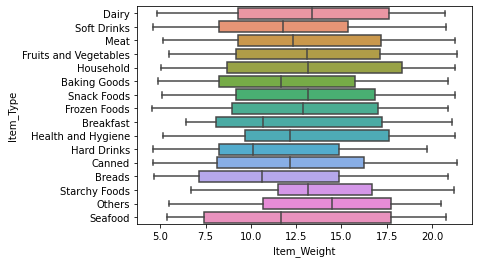

In [36]:
sns.boxplot(data =df, x = 'Item_Weight', y='Item_Type')

In [37]:
# no outliers, we will use mean to fill missing values
df[df['Item_Weight'].isna()]['Item_Type'].nunique()

16

In [38]:
df[df['Item_Weight'].isna()]['Item_Type'].value_counts()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

In [39]:
# fill item weights null with mean of respective Item type
means = {}
items =list( df['Item_Type'].unique())
for i in items:
    means[i] = df[df['Item_Type'] == i]['Item_Weight'].mean()

In [40]:
means

{'Dairy': 13.42606890459367,
 'Soft Drinks': 11.847459893048129,
 'Meat': 12.81734421364986,
 'Fruits and Vegetables': 13.224769381746881,
 'Household': 13.384736495388726,
 'Baking Goods': 12.277108208955255,
 'Snack Foods': 12.987879554655919,
 'Frozen Foods': 12.867061281337076,
 'Breakfast': 12.768202247191002,
 'Health and Hygiene': 13.142313953488392,
 'Hard Drinks': 11.400327868852452,
 'Canned': 12.305705009276451,
 'Breads': 11.3469362745098,
 'Starchy Foods': 13.690730769230765,
 'Others': 13.853284671532842,
 'Seafood': 12.5528431372549}

In [41]:
# select each item type rows,Weight feature, fill missing value by corresp item type's mean weight
for item in means:
    df.loc[df['Item_Type'] == item,'Item_Weight'] = df['Item_Weight'].fillna(means[item])

In [42]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [43]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,-0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008376,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,-0.049135,1.000000


## Split X and y

In [44]:
X = df.drop(['Item_Outlet_Sales'], axis =1)
y = df['Item_Outlet_Sales']

In [45]:
X.nunique()

Item_Identifier              1559
Item_Weight                   431
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [46]:
Xclean = X.copy() # for later use
Xclean.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### Encoding

In [47]:
#'Item_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Size'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Item_Identifier'] = le.fit_transform(X['Item_Identifier'])


In [48]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for f in ['Outlet_Location_Type','Outlet_Size']:
    X[f] = oe.fit_transform(X[[f]])

In [49]:
from sklearn.preprocessing import OneHotEncoder
X= pd.get_dummies(X, columns=['Outlet_Identifier','Item_Type','Outlet_Type','Item_Fat_Content'])

In [50]:
X.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857890,0.066132,140.992782,1997.831867,1.453596,1.112871,0.065118,0.109351,0.108647,...,0.007509,0.140795,0.052212,0.017365,0.127068,0.654347,0.108882,0.109703,0.647307,0.352693
std,449.222377,4.232804,0.051598,62.275067,8.371760,0.683084,0.812757,0.246748,0.312098,0.311214,...,0.086334,0.347831,0.222467,0.130634,0.333069,0.475609,0.311509,0.312538,0.477836,0.477836
min,0.000000,4.555000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,395.500000,9.310000,0.026989,93.826500,1987.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,783.000000,12.867061,0.053931,143.012800,1999.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1167.000000,16.000000,0.094585,185.643700,2004.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1558.000000,21.350000,0.328391,266.888400,2009.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train test split

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [52]:
X_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
549,1102,9.500,0.035206,171.3448,1999,1.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7757,1322,18.000,0.047473,170.5422,2002,2.0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
764,1169,17.600,0.076122,111.7202,1997,2.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6867,789,8.325,0.029845,41.6138,2002,2.0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2716,757,12.850,0.137228,155.5630,1997,2.0,0.0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1172,9.395,0.286345,139.1838,1998,2.0,2.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5191,263,15.600,0.117575,75.6670,2007,2.0,1.0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
5390,1464,17.600,0.018944,237.3590,2002,2.0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
860,609,20.350,0.054363,117.9466,2007,2.0,1.0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


### KNNregressor

Text(0, 0.5, 'accuracy')

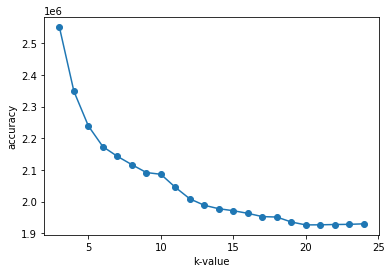

In [53]:
# Import the knn regressor class 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Create an instance of the class
knn = KNeighborsRegressor()

err_values = [] # to store accuracy values for different neighbors
neighbors = np.arange(3,25)
for k in neighbors:
    kr = KNeighborsRegressor(n_neighbors = k)
    kr.fit(X_train,y_train)
    y_pred = kr.predict(X_test)
    err = mean_squared_error(y_test, y_pred)
    err_values.append(err)

plt.plot(neighbors,err_values,'o-')
plt.xlabel('k-value')
plt.ylabel('accuracy')
# knn = KNeighborsRegressor(n_neighbors=12)
# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)
# mean_squared_error(y_pred_knn, y_test)

In [54]:
knn20 = KNeighborsRegressor(n_neighbors= 20 )
knn20.fit(X_train,y_train)
y_pred_knn = knn20.predict(X_test)
mean_squared_error(y_pred_knn, y_test)

1926033.5430965545

In [55]:
import joblib

In [56]:
file = 'knn20.sav'
joblib.dump(knn20,file)

['knn20.sav']

## KNN with feature reduction

In [57]:
select = ['Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Identifier', 'Outlet_Type']
#select is based on EDA
X1= Xclean[select]

In [58]:
from sklearn.preprocessing import OneHotEncoder
X1= pd.get_dummies(X1, columns=['Outlet_Identifier','Outlet_Type'])    

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,random_state=42,test_size=0.2)

In [60]:
knn20fr = KNeighborsRegressor(n_neighbors= 20 )
knn20fr.fit(X_train,y_train)
y_pred_knn = knn20fr.predict(X_test)
mean_squared_error(y_pred_knn, y_test)

1464076.9396781616

In [61]:
file = 'knn20fr.sav'
joblib.dump(knn20fr,file)

['knn20fr.sav']

## KNN with feature reduction and Scaling

In [62]:
Xs = Xclean[select]
from sklearn.preprocessing import OneHotEncoder
Xs= pd.get_dummies(Xs, columns=['Outlet_Identifier','Outlet_Type'])    

In [63]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler()
Xs['Item_MRP'] = sc.fit_transform(Xs[['Item_MRP']])
Xs['Outlet_Establishment_Year'] = sc.fit_transform(Xs[['Outlet_Establishment_Year']])

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xs,y,random_state=42,test_size=0.2)

knn20frSc = KNeighborsRegressor(n_neighbors= 20 )
knn20frSc.fit(X_train,y_train)
y_pred_knn = knn20frSc.predict(X_test)
mean_squared_error(y_pred_knn, y_test)

1053562.3021689616

In [65]:
file = 'knn20frSc.sav'
joblib.dump(knn20frSc,file)

['knn20frSc.sav']

## Random Forest

Random Forest is more robust to outliers. This data has outliers and these are possible values.

In [66]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'O

In [67]:
drop = ['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular','Item_Visibility']
X1 = X.drop(drop, axis =1)
X_train,X_test,y_train,y_test=train_test_split(X1,y,random_state=42,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,max_depth=60, min_samples_leaf=90,n_jobs=20, min_weight_fraction_leaf = .005, random_state = 42)
#rf = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
rf.fit(X_train, y_train)
pred3 = rf.predict(X_test)
MSE=mean_squared_error(y_test,pred3)
MSE

1032532.3615834162

In [68]:
#n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4  1034458.5493650491  ====final

#n_estimators=500,max_depth=50, min_samples_leaf=60,n_jobs=20  1038623.2223914289

In [69]:
file = 'rf3drop.sav'
joblib.dump(rf,file) 

['rf3drop.sav']